In [11]:
import os
import generate_features
import polars as pl

input_dir = "./output_clips"
fnames = os.listdir(input_dir)
df = pl.DataFrame()
for fname in fnames:
    input_file = os.path.join(input_dir, fname)
    ext = fname.split(".")[-1]
    is_json = ext == "json"
    out_df = generate_features.main(input_file, is_json)
    df = df.vstack(out_df)


from sklearn.preprocessing import StandardScaler

print(df)
scaler = StandardScaler()
name_df = df.clone()
df = df.select(
    pl.exclude("name")
)
df = pl.DataFrame(scaler.fit_transform(df))
data = df.to_numpy()
print(df)
print(df.std())
print(df.mean())

# weight
# df = df.with_columns(
#     column_74 = pl.col("column_74") * 3,
#     column_75 = pl.col("column_75") * 3,
# )

print(df)
print(df.std())
print(df.mean())


shape: (99, 77)
┌──────────┬──────────┬──────────┬──────────┬───┬──────────┬──────────┬────────────┬───────────────┐
│ f1_min   ┆ f1_max   ┆ f1_std   ┆ f1_mean  ┆ … ┆ f19_max  ┆ f19_std  ┆ f19_mean   ┆ name          │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---        ┆ ---           │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64      ┆ f64        ┆ str           │
╞══════════╪══════════╪══════════╪══════════╪═══╪══════════╪══════════╪════════════╪═══════════════╡
│ 0.799281 ┆ 1.007484 ┆ 0.073116 ┆ 0.932172 ┆ … ┆ 0.001576 ┆ 0.000177 ┆ 1.8636e-8  ┆ dance_data_60 │
│          ┆          ┆          ┆          ┆   ┆          ┆          ┆            ┆ _corrected    │
│ 0.992883 ┆ 0.997509 ┆ 0.001072 ┆ 0.994284 ┆ … ┆ 0.000068 ┆ 0.000011 ┆ -1.8950e-7 ┆ dance_data_75 │
│          ┆          ┆          ┆          ┆   ┆          ┆          ┆            ┆ _corrected    │
│ 0.860762 ┆ 0.988121 ┆ 0.038375 ┆ 0.944305 ┆ … ┆ 0.00117  ┆ 0.000213 ┆ -5.

(99, 76)


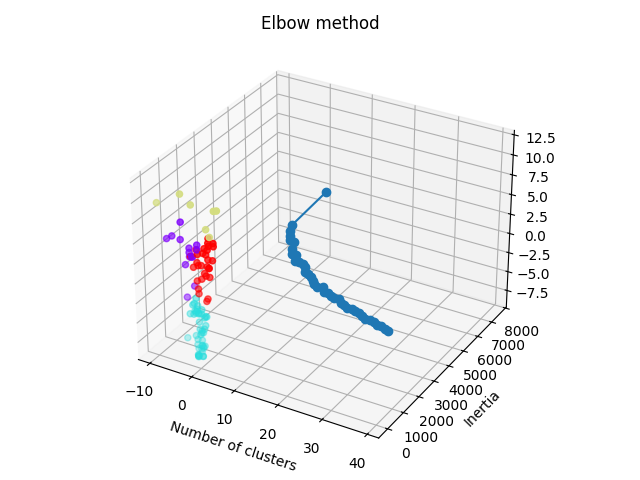

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print(data.shape)
inertias = []
for i in range(1,40):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1,40), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
from sklearn.cluster import KMeans

print(data.shape)
kmeans = KMeans(n_clusters=8)
kmeans.fit(data)
clusters = kmeans.predict(data)
print(clusters)

cluster_dict = {"cluster": clusters}
cluster_df = pl.from_dict(cluster_dict)

df = df.hstack(cluster_df)
print(df)


(99, 76)
[2 1 2 2 5 1 7 5 5 3 1 0 5 0 0 7 3 1 7 3 4 5 7 1 3 2 1 0 0 3 1 3 1 6 0 3 3
 4 3 7 3 1 1 0 0 3 0 3 1 0 1 1 4 0 1 3 2 1 2 0 1 0 1 3 1 3 5 7 1 4 3 1 0 5
 1 0 1 0 1 1 1 4 1 4 4 7 1 7 1 1 4 4 1 4 0 7 1 4 5]
shape: (99, 77)
┌──────────┬──────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬─────────┐
│ column_0 ┆ column_1 ┆ column_2  ┆ column_3 ┆ … ┆ column_73 ┆ column_74 ┆ column_75 ┆ cluster │
│ ---      ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---     │
│ f64      ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64       ┆ f64       ┆ i32     │
╞══════════╪══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═════════╡
│ -0.15847 ┆ 0.48042  ┆ 0.645263  ┆ 0.212905 ┆ … ┆ 0.2754    ┆ -0.213739 ┆ -0.100839 ┆ 2       │
│ 1.225637 ┆ 0.326537 ┆ -0.972123 ┆ 0.960986 ┆ … ┆ -0.88773  ┆ -1.111091 ┆ -0.164757 ┆ 1       │
│ 0.281076 ┆ 0.181714 ┆ -0.13466  ┆ 0.359045 ┆ … ┆ -0.037403 ┆ -0.013745 ┆ -0.27805  ┆ 2      

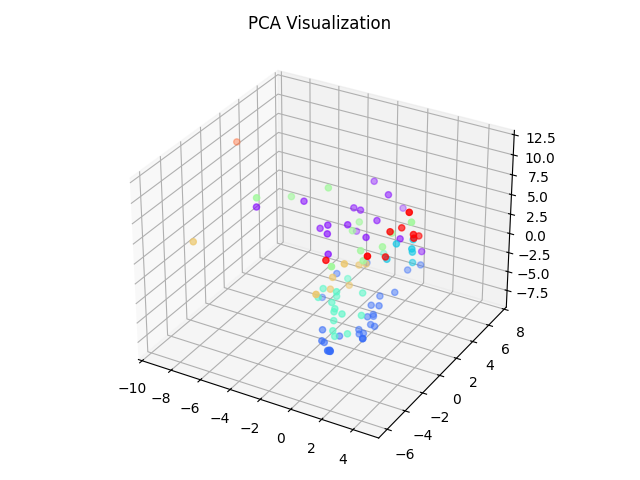

In [14]:
from sklearn.decomposition import PCA
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data) 
data = df.with_columns(
    pl.exclude("cluster")
    ).to_numpy()

clusters = df["cluster"]

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:, 2], X_pca[:, 1], X_pca[:, 0], c=clusters, cmap=plt.cm.rainbow)
plt.title("PCA Visualization")
plt.tight_layout()
plt.show()

In [15]:
named_cluster = name_df.hstack(cluster_df.select(pl.col("cluster")))
named_cluster = named_cluster.select(
    pl.col("name"),
    pl.col("cluster"),
).sort(
    pl.col("cluster")
)

print(named_cluster)
named_cluster.write_csv("./named_cluster_out.csv")

shape: (99, 2)
┌─────────────────────────┬─────────┐
│ name                    ┆ cluster │
│ ---                     ┆ ---     │
│ str                     ┆ i32     │
╞═════════════════════════╪═════════╡
│ dance_data_85_corrected ┆ 0       │
│ dance_data_91_corrected ┆ 0       │
│ dance_data_84_corrected ┆ 0       │
│ dance_data_94_corrected ┆ 0       │
│ dance_data_89_corrected ┆ 0       │
│ …                       ┆ …       │
│ dance_data_70_corrected ┆ 7       │
│ dance_data_21_corrected ┆ 7       │
│ dance_data_23_corrected ┆ 7       │
│ dance_data_46_corrected ┆ 7       │
│ dance_data_25_corrected ┆ 7       │
└─────────────────────────┴─────────┘
